# NYC Taxi Fare Prediction

### **Table of Contents**
1. Download data
2. Read data using Pandas
3. Exploratory data anaysis and data cleaning
4. Feature engineering 
5. Understand temporal feature conversions 
6. Machine learning with TensorFlow
7. Todo
8. Todo
9. ...

## Import packages

In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import tensorflow as tf

## 1. Download data
Download data using ```wget```. A large volume of data is available at https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page, but we are going to use only ```yellow_tripdata_2020-06.csv```, which has 499,000 data points. 


In [ ]:
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-02.csv
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-04.csv
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-05.csv
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-06.csv

## 2. Read data using Pandas

Let's try to peek the data using ```head``` method. The definition of each column names can be found from [here](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf). Also note that ```PULocationID``` and ```DOLocationID``` indicate pickup and dropoff zones. More details can be checked from [here](https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv).

In [2]:
data = pd.read_csv('./yellow_tripdata_2020-06.csv')
data.head()

/home/wooram/anaconda3/envs/tf2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.6,1.0,N,140,68,1.0,15.5,3.0,0.5,4.00,0.0,0.3,23.30,2.5
1,1.0,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.6,1.0,N,79,226,1.0,19.5,3.0,0.5,2.00,0.0,0.3,25.30,2.5
2,1.0,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.3,1.0,N,238,116,2.0,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0.0
3,1.0,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.3,1.0,N,141,116,2.0,17.5,3.0,0.5,0.00,0.0,0.3,21.30,2.5
4,1.0,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.4,1.0,N,186,75,1.0,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5


## 3. Exploratory data analysis

```describe``` is a very useful method to get summary statistics for the numeric fields of the data. Clearly, there is something wrong with the data
* Different ```count``` values of each column

In [3]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,499043.000000,499043.000000,549760.000000,499043.000000,549760.000000,549760.000000,499043.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000
mean,1.598351,1.356148,4.104275,1.047214,157.636474,153.473989,1.373327,13.606734,1.023772,0.491298,1.762904,0.367066,0.296980,18.768912,1.967681
std,0.490232,1.016665,336.024280,1.095790,69.756787,73.842217,0.531616,13.521364,1.263818,0.080832,2.631495,1.751982,0.041437,15.178965,1.044792
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-216.000000,-4.500000,-0.500000,-36.300000,-28.750000,-0.300000,-216.300000,-2.500000
25%,1.000000,1.000000,1.010000,1.000000,107.000000,87.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.700000,2.500000
50%,2.000000,1.000000,1.860000,1.000000,151.000000,151.000000,1.000000,9.000000,0.500000,0.500000,1.500000,0.000000,0.300000,14.160000,2.500000
75%,2.000000,1.000000,3.660000,1.000000,234.000000,233.000000,2.000000,15.500000,2.500000,0.500000,2.750000,0.000000,0.300000,20.800000,2.500000
max,2.000000,9.000000,220386.230000,99.000000,265.000000,265.000000,5.000000,941.500000,87.560000,3.300000,422.680000,114.750000,0.300000,1141.100000,2.500000


Let's remove invalid instances (rows) using ```dropna```, and we have a consistent number of instances. 

In [4]:
clean_data = data.dropna().dropna()
clean_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.00000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000
mean,1.598351,1.356148,2.864602,1.047214,160.197672,155.456091,1.373327,11.844105,1.12473,0.491592,1.772877,0.221110,0.296680,17.027168,2.103727
std,0.490232,1.016665,32.119857,1.095790,68.832677,73.466849,0.531616,11.449169,1.28302,0.081359,2.696115,1.368441,0.043455,13.431950,0.939306
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-216.000000,-4.50000,-0.500000,-36.300000,-28.750000,-0.300000,-216.300000,-2.500000
25%,1.000000,1.000000,1.000000,1.000000,107.000000,90.000000,1.000000,6.000000,0.00000,0.500000,0.000000,0.000000,0.300000,10.300000,2.500000
50%,2.000000,1.000000,1.710000,1.000000,161.000000,153.000000,1.000000,8.500000,0.50000,0.500000,1.500000,0.000000,0.300000,13.560000,2.500000
75%,2.000000,1.000000,3.140000,1.000000,234.000000,234.000000,2.000000,13.500000,2.50000,0.500000,2.650000,0.000000,0.300000,18.950000,2.500000
max,2.000000,9.000000,22543.990000,99.000000,265.000000,265.000000,5.000000,941.500000,87.56000,3.300000,422.680000,114.750000,0.300000,1141.100000,2.500000


Now, let's use a basic intuition that there should be correlation between ```trip_distance``` and ```fare_amount```, but the scatter does not show what is expected. It is because..
* Zero value for ```passenger_count```
* Zero value for ```trip_distance```
* Negative ```fare_amount```, ```extra```, ```mta_tax```, etc.

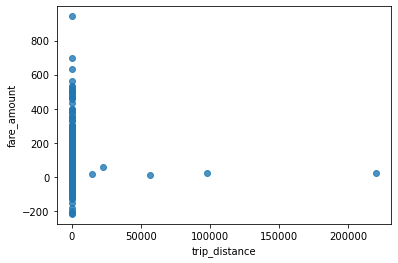

In [5]:
ax = sb.regplot(x="trip_distance", y='fare_amount', fit_reg=False, ci=None, truncate=True, data=data)

Again, let's remove invalid instances (rows), and it looks good.

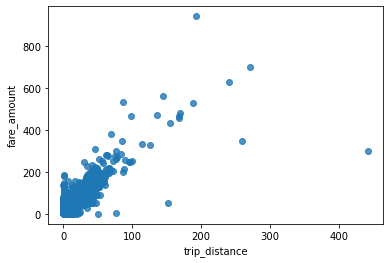

In [7]:
clean_data = clean_data[clean_data['total_amount'] > 0]
clean_data = clean_data[clean_data['trip_distance'] > 0]
clean_data = clean_data[clean_data['trip_distance'] < 10000]
clean_data = clean_data[clean_data['passenger_count'] > 0]
clean_data = clean_data[clean_data['fare_amount'] > 0]
ax = sb.regplot(x="trip_distance", y='fare_amount', fit_reg=False, ci=None, truncate=True, data=clean_data)